## To start working on our data we'll need to work with Pandas, and import data from our google drive

In [0]:
import pandas as pd
import numpy as np
from google.colab import drive
from matplotlib import pyplot as plt


## Another library we'll start work with intensly is Sci Kit Learn (sklearn) which is the most widely used open source library for machine learning in python

In [0]:
from sklearn import preprocessing


## We'll now mount our google drive so we can use data we load into it

In [0]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Now we can acces our data as if it was on a local drive at data

In [0]:
data = pd.read_csv('/content/drive/My Drive/data/titanic_train.csv')


## Let's take a look at the titanic data again, we have both categoric and numeric

In [0]:
data.head(3)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## We'll convert the "Sex" column to binary feature:

In [0]:
data = data.assign(is_female = (data.Sex =='female')*1)

In [0]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_female
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


## For demonstration purposes we will only focus on numeric features for this excersize

In [0]:
only_numeric_data = data[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare','is_female']]
only_numeric_data.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,is_female
0,0,3,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,1,3,26.0,0,0,7.9250,1


## Another thing we will do is remove all rows with missing data

In [0]:
data_no_na = only_numeric_data.dropna()

## Now let's take a look at 2 random features and how they relate to our target variable

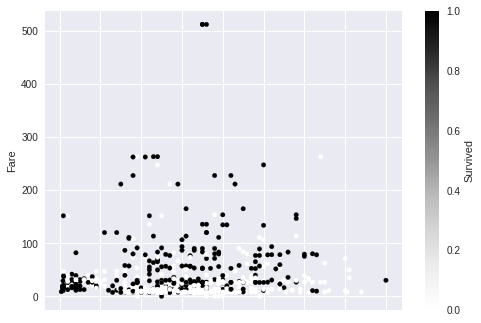

In [0]:
data_no_na.plot.scatter(x='Age',y='Fare', c='Survived')

## Let's get down to bussiness, our data set must now be split into our feature set (X), and target variable (y)

In [0]:
only_features = data_no_na.drop(columns=['Survived']) 
only_features.head(3)

,Pclass,Age,SibSp,Parch,Fare,is_female
0,3,22.0,1,0,7.2500,0
1,1,38.0,1,0,71.2833,1
2,3,26.0,0,0,7.9250,1


In [0]:
target = data_no_na[['Survived']]
target.head(3)

,Survived
0,0
1,1
2,1


## In order to train the model we need to split it to trainend data set and test set (hold out) which we will use to analyze our models perfomance

In [0]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(only_features,target, test_size = 0.30, random_state = 10)



## Now we will learn model on training data set

In [0]:
from sklearn.neighbors import KNeighborsClassifier

#create object of the lassifier
neigh = KNeighborsClassifier(n_neighbors=3)

#Train the algorithm
neigh.fit(data_train, target_train)
print neigh.predict(data_test.head())


[1 0 1 0 0]


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


In [0]:
target_test.head()

,Survived
728,0
555,0
426,1
278,0
617,0


#### Let's take a look into a single point classification

Pandas(Index=728, Pclass=2, Age=25.0, SibSp=1, Parch=0, Fare=26.0, is_female=0)
[1]


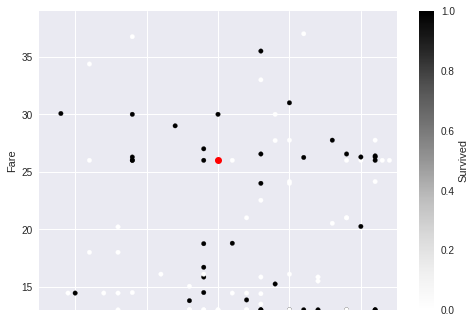

In [0]:
data_train.assign(Survived = target_train).plot.scatter(x='Age',y='Fare', c='Survived')
for row in data_test.head(1).itertuples():
  print row
  plt.plot(row.Age,row.Fare,'or')
print neigh.predict(data_test.head(1))

  
plt.ylim(row.Fare*0.5,row.Fare*1.5)
plt.xlim(row.Age*0.5,row.Age*1.5);

#note - generate a separation map:
#https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html

## Now we'll import all the modules we need to test models and compare them

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


## Let's look at some different metrics for the model on data 

In [0]:
# predict the response
pred = neigh.predict(data_test)

# evaluate accuracy
print ("KNeighbors accuracy score : ",accuracy_score(target_test, pred))
print ("KNeighbors recall score : ",recall_score(target_test, pred))


('KNeighbors accuracy score : ', 0.6558139534883721)
('KNeighbors recall score : ', 0.5222222222222223)


In [0]:
def plt_details():
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

## Now we'll look at the ROC curve for the model we built and calculate the AUC ROC

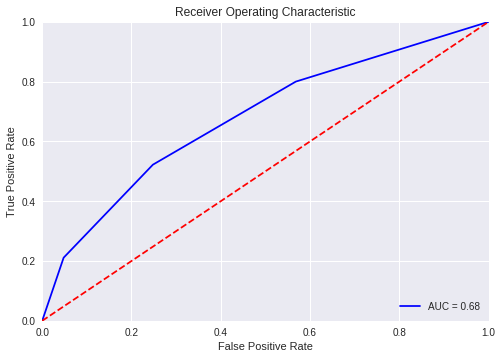

In [0]:
# calculate the fpr and tpr for all thresholds of the classification
probs = neigh.predict_proba(data_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(target_test, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt_details()

## Let's introduce scaling

In [0]:

min_max_scaler = preprocessing.MinMaxScaler()
data_train_scaled = min_max_scaler.fit_transform(data_train)
data_test_scaled = min_max_scaler.transform(data_test)

/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


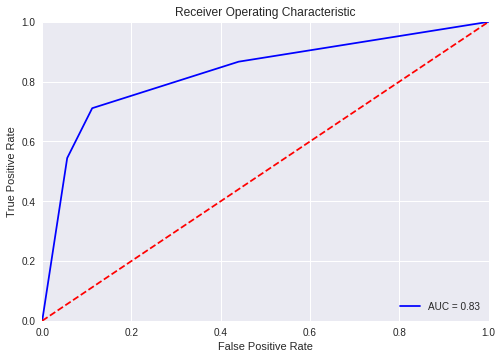

In [0]:
neigh.fit(data_train_scaled, target_train)
probs = neigh.predict_proba(data_test_scaled)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(target_test, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt_details()

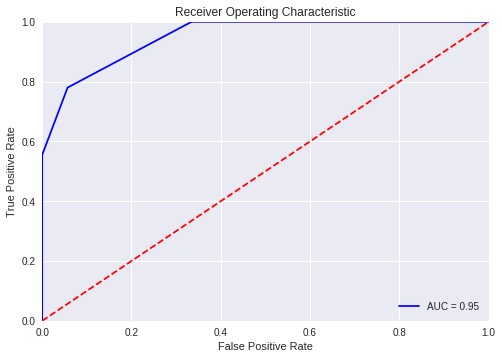

In [0]:
# and for train set:
probs = neigh.predict_proba(data_train_scaled)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(target_train, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt_details()

## Let's run the classification again for a number of  differnt Ks compate ROC curves

---



/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


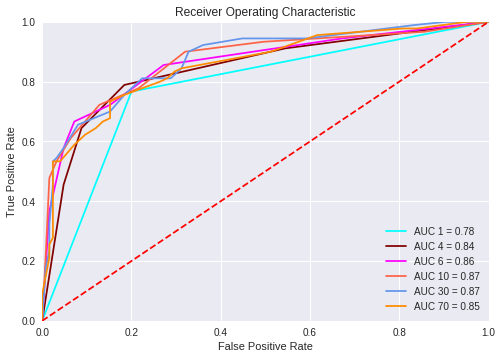

In [0]:
colors = ['aqua','maroon', 'magenta', 'tomato', 'cornflowerblue', 'darkorange']
plt.figure()

for i,k in enumerate([1,4,6,10,30,70]):
  neigh = KNeighborsClassifier(n_neighbors=k)
  neigh.fit(data_train_scaled, target_train)
  probs = neigh.predict_proba(data_test_scaled)
  preds = probs[:,1]
  fpr, tpr, threshold = roc_curve(target_test, preds)
  roc_auc = auc(fpr, tpr)
  plt.plot(fpr, tpr, 'b', label = 'AUC ' + str(k) +' = %0.2f' % roc_auc, color= colors[i])
plt_details()

### We'll check all the K's to find the best AUC

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


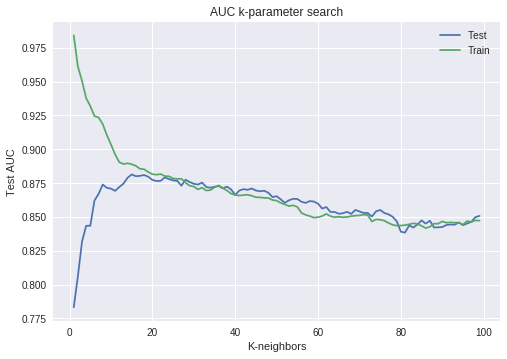

In [0]:
aucs = []
train_auc = []
best = (0,0)
for i,k in enumerate(range(1,100)):
  neigh = KNeighborsClassifier(n_neighbors=k)
  neigh.fit(data_train_scaled, target_train)
  probs = neigh.predict_proba(data_test_scaled)
  preds = probs[:,1]
  fpr, tpr, threshold = roc_curve(target_test, preds)
  roc_auc = auc(fpr, tpr)
  aucs.append(roc_auc)
  
  probs_tr = neigh.predict_proba(data_train_scaled)
  fpr, tpr, threshold = roc_curve(target_train, probs_tr[:,1])
  roc_auc1 = auc(fpr, tpr)
  train_auc.append(roc_auc1)
  
  if roc_auc>best[1]:
    best = (k,roc_auc)
  
plt.plot(range(1,100),aucs, label ='Test')
plt.plot(range(1,100),train_auc, label='Train')
plt.xlabel('K-neighbors')
plt.ylabel('Test AUC')
plt.legend()
plt.title('AUC k-parameter search');
print best


## Take a look at the confusion matrix of our classifier
- we'll pick an arbitraty threshold of 0.2

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


Confusion matrix, without normalization
[[86 39]
 [ 8 82]]


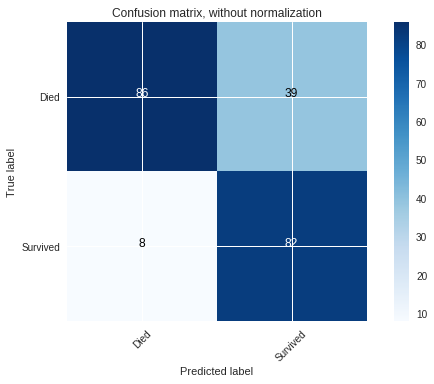

In [0]:
from sklearn.metrics import confusion_matrix
import itertools

neigh = KNeighborsClassifier(n_neighbors=best[0])
neigh.fit(data_train_scaled, target_train)

threshold = 0.2

prediction = (neigh.predict_proba(data_test_scaled)[:,1]>threshold)*1
conf_mat = confusion_matrix(target_test, prediction)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
    

plot_confusion_matrix(conf_mat, classes=['Died','Survived'],
                      title='Confusion matrix, without normalization')

tn, fp, fn, tp = conf_mat.ravel()

### Calculate Accuracy, Recall, Precision and F1-score

In [0]:
accuracy = (tp+tn)*1.0/(tp+fp+tn+fn)
recall = tp*1.0/(tp+fn)
precision = tp*1.0/(tp+fp)
f1 = 2*(recall * precision) / (recall + precision)


print('Accuracy is {:.2f}, Recall is {:.2f}, Precision is {:.2f}, F1 is {:.2f}'.format(accuracy,recall,precision,f1))

Accuracy is 0.56, Recall is 0.92, Precision is 0.49, F1 is 0.64


## Last let's try to analyze the performance aspects of K-NN:
see more about fast KNN- https://www.youtube.com/watch?v=NOLLG0qz6zo

In [0]:
%%timeit

# 1000 iteration with 400 neighbours

aucs = []
best = (0,0)
for i,k in enumerate(range(1000)):
  neigh = KNeighborsClassifier(n_neighbors=400,algorithm='kd_tree')
  neigh.fit(data_train_scaled, target_train)
  probs = neigh.predict_proba(data_test_scaled)
  preds = probs[:,1]
  fpr, tpr, threshold = roc_curve(target_test, preds)
  roc_auc = auc(fpr, tpr)
  aucs.append(roc_auc)
  if roc_auc>best[1]:
    best = (k,roc_auc)
  
print("AUC is {:.5f}".format(best[1]))

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


AUC is 0.73249
AUC is 0.73249
AUC is 0.73249
AUC is 0.73249
1 loop, best of 3: 18.5 s per loop


In [0]:
%%timeit

aucs = []
best = (0,0)
for i,k in enumerate(range(1000)):
  neigh = KNeighborsClassifier(n_neighbors=400,algorithm='brute')
  neigh.fit(data_train_scaled, target_train)
  probs = neigh.predict_proba(data_test_scaled)
  preds = probs[:,1]
  fpr, tpr, threshold = roc_curve(target_test, preds)
  roc_auc = auc(fpr, tpr)
  aucs.append(roc_auc)
  if roc_auc>best[1]:
    best = (k,roc_auc)
  

  
print("AUC is {:.5f}".format(best[1]))

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:262: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


AUC is 0.73289
AUC is 0.73289
AUC is 0.73289
AUC is 0.73289
1 loop, best of 3: 19.6 s per loop
